# Pythonで作って学ぶ統計モデリング

https://www.bigdata-navi.com/aidrops/2726/

In [2]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

(0.0, 10.0)

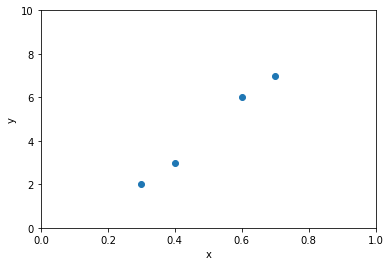

In [3]:
# データの読み込みと可視化
# データ
X = [0.3,0.4,0.6,0.7]
Y = [2,3,6,7]
# 散布図で可視化
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([0,10])

In [4]:
# 線形回帰モデル
with pm.Model() as model_linear:
    pm_a = pm.Normal('pm_a', mu=0.0, sd=10.0)
    pm_b = pm.Normal('pm_b', mu=0.0, sd=10.0)
    pm_Y = pm.Normal('pm_Y', mu=pm_a * X + pm_b, sd=1.0, observed=Y)

In [5]:
# 一次関数のサンプル
with model_linear:
    prior_samples = pm.sample_prior_predictive(100)

Text(0, 0.5, 'y')

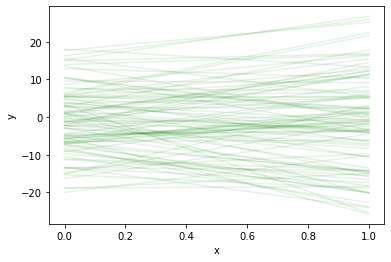

In [6]:
# 一次関数の可視化
X_range = np.linspace(0,1, 1000)
for i in range(100):
    plt.plot(X_range, [prior_samples['pm_a'][i]*x + prior_samples['pm_b'][i] for x in X_range], 'g-', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')

In [9]:
# MCMCの実行
with model_linear:
    posterior_samples = pm.sample(100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pm_b, pm_a]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 28 seconds.
The acceptance probability does not match the target. It is 0.7207151374854166, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9032083878851114, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8838514392882182, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9144960512041517, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


Text(0, 0.5, 'y')

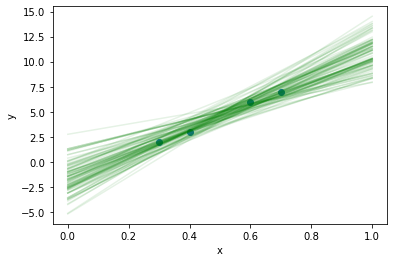

In [10]:
# 予測の可視化
X_range = np.linspace(0, 1, 1000)
plt.figure()
for i in range(100):
    plt.plot(X_range, [posterior_samples['pm_a'][i] * x + posterior_samples['pm_b'][i] for x in X_range], 'g-', alpha=0.1)
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')